In [56]:
import numpy as np
from scipy.signal import hanning, firwin
import matplotlib.pyplot as plt

# Le nombre de coefficients nécessaires pour qu’un filtre RIF respecte les contraintes données par le gabarit 

- ν1 = 0.15
- ν2 = 0.20
- une ondulation de 3dB dans la bande passante (dont on peut déduire δ1)
- une atténuation de 40dB dans la bande atténuée (dont on peut déduire δ2)

In [2]:
def coef_number(delta1, delta2, mu1, mu2):
    m = (2/3)*np.log10(1/(10*delta1*delta2))*(1/(mu2-mu1))
    m =  np.round(m)
    return m + 1 if m%2 == 0 else m


mu1 = 0.15
mu2 = 0.20

c = 10**(3/40)

delta1 = (10**(3/20) - 1)/(1 + 10**(3/20))
delta2 = (1 + delta1)/10**2
delta1, delta2



(0.17099735734361904, 0.01170997357343619)

In [32]:
M = int(coef_number(delta1, delta2, mu1, mu2))
print("nombre de coefficient necessaire : ", M)

nombre de coefficient necessaire :  23


# calcul les coefficients d’un filtre RIF obtenus par la méthode de la fenêtre

#  fenêtre rectangulaire

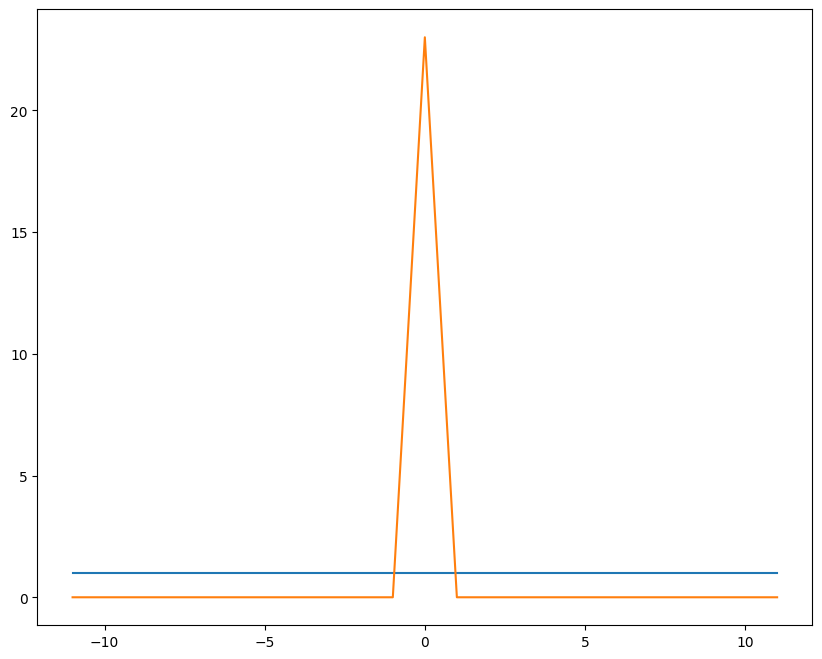

In [22]:
fe = mu2-mu1

f = np.arange(-(M-1)//2, M//2 + 1)
rect = np.ones(int(M))
plt.figure(1, figsize=(10, 8))


plt.plot(f, rect, label="signal rectangle")
plt.plot(f, np.abs(np.fft.fftshift(np.fft.fft(rect, M))))

/tmp/ipykernel_27840/1200721580.py:4: DeprecationWarning: `hanning` is deprecated, use `scipy.signal.windows.hann` instead!
  hanning_signal = hanning(M)


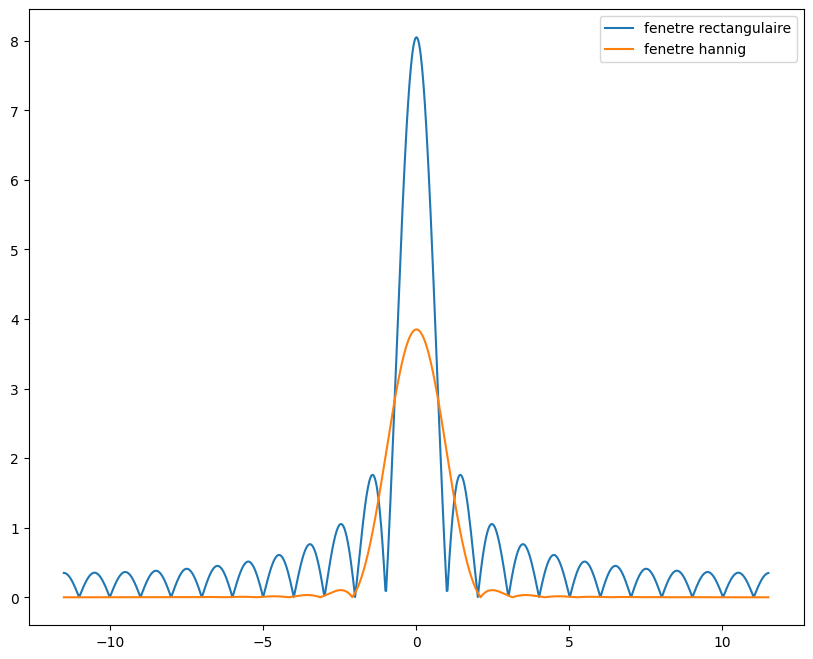

In [80]:
fc = (mu2+mu1)/2

f = np.linspace(-M/2, M/2, 1000)
hanning_signal = hanning(M)
rect = np.ones(M)
plt.figure(1, figsize=(10, 8))


plt.plot(f, 2*fc*np.abs(np.fft.fftshift(np.fft.fft(rect, 1000))), label="fenetre rectangulaire")

plt.plot(f, 2*fc*np.abs(np.fft.fftshift(np.fft.fft(hanning_signal, 1000))), label="fenetre hannig")
plt.legend()

[]

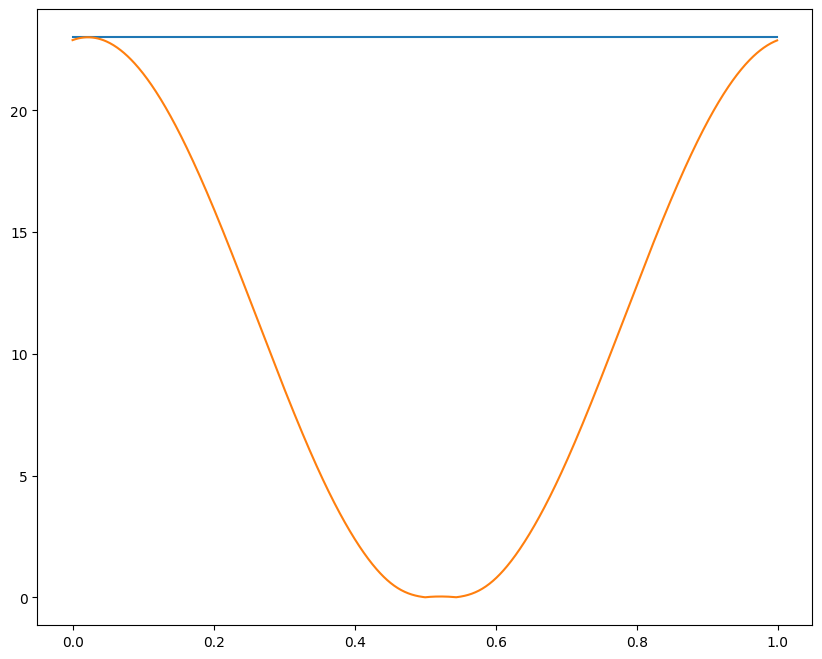

In [106]:
fft_hanning = np.fft.fftshift(np.fft.fft(hanning_signal, M))
ffft_rect = np.fft.fftshift(np.fft.fft(rect, M))
f = np.arange(1000)/1000


plt.figure(1, figsize=(10, 8))
plt.plot(f, np.abs(np.fft.fftshift(np.fft.fft(ffft_rect, 1000))), label="fenetre hannig")
plt.plot(f, np.abs(np.fft.fftshift(np.fft.fft(fft_hanning, 1000))), label="fenetre hanning")
plt.plot()


# a revoir

[]

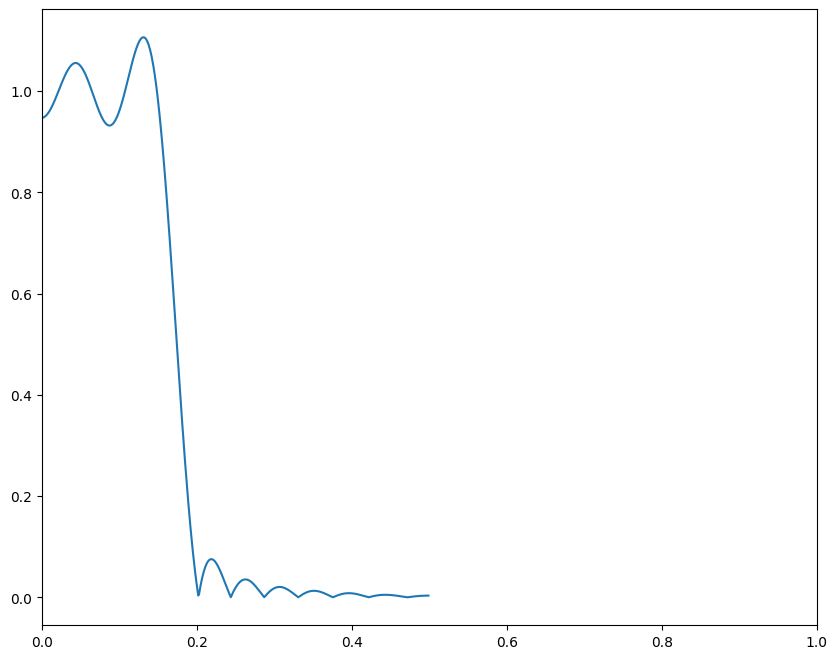

In [102]:
f = np.arange(1000)/1000 -.5
k = np.arange(M) -M//2

signal_card = 2*fc*np.sinc(2*fc*k)

plt.figure(1, figsize=(10, 8))
# plt.plot(f, signal_card, label="fenetre hanning")
plt.plot(f, np.abs(np.fft.fftshift(np.fft.fft(signal_card, 1000))), label="fenetre hannig")
plt.xlim([0, 1])
plt.plot()

# Comparer les résultats obtenus à ceux donnés par la fonction firwin de scipy.signal

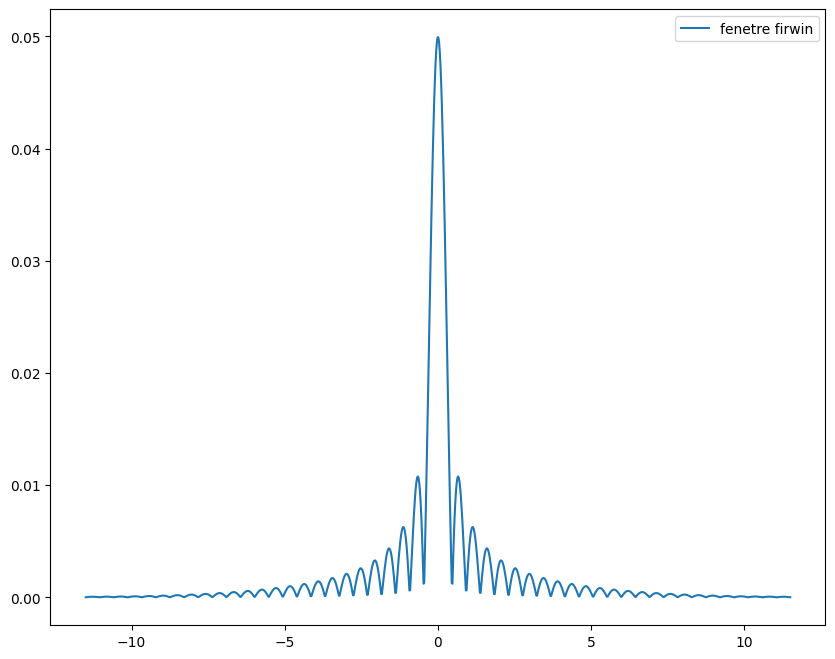

In [73]:
f = np.linspace(-M/2, M/2, 1000)
firwin_signal = firwin(1000, fc)
rect = np.ones(M)
plt.figure(1, figsize=(10, 8))

plt.plot(f, np.abs(firwin_signal), label="fenetre firwin")
plt.legend()
plt.show()
